In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes2.csv


## Library

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
import pandas_profiling as pp 
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score,roc_curve,roc_auc_score

%matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

## The Data

In [3]:
df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes2.csv')

In [4]:
df_temp = df.copy()

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.shape

(768, 9)

In [8]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

The number of patients who has diabetes are lower than the others.

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Visualisation

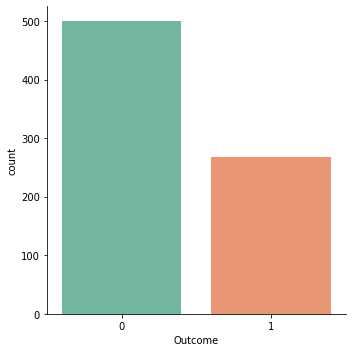

In [10]:
# The visualisation of outcome
sns.catplot(x="Outcome", kind="count", data=df_temp, palette="Set2")
plt.show()

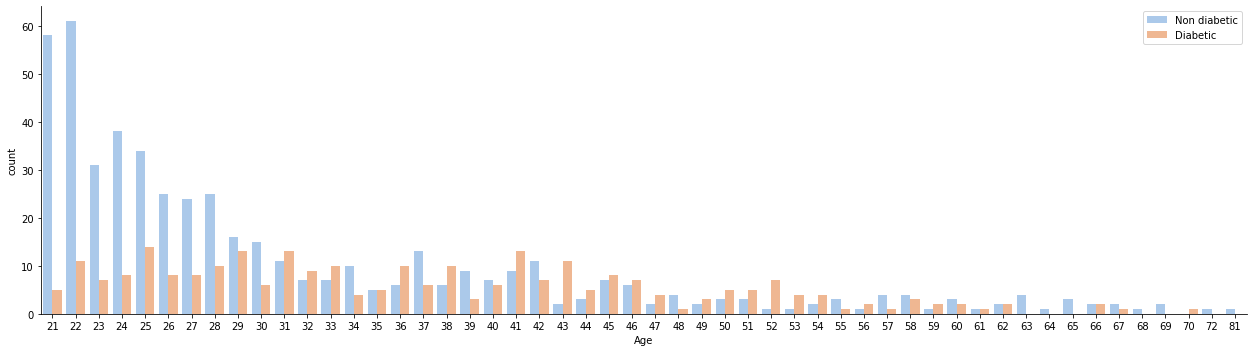

In [11]:
# The visualisation count of Age of their diabetics
ax = sns.catplot(x="Age", kind="count",hue="Outcome",data=df_temp, palette="pastel", legend=False)
ax.fig.set_figwidth(20)
plt.legend(loc='upper right', labels= ["Non diabetic", "Diabetic"])
plt.show()

In [12]:
# Age Distribution
fig = px.histogram(df, x="Age",
                   marginal="box")
fig.show()

In [13]:
# Age distribution by Outcome 0
fig = px.histogram(df, x=df[df.Outcome==0].Age,
                   marginal="box",
                   color_discrete_sequence=['lightgreen'])
fig.show()

In [14]:
# Age distribution by Outcome 0
fig = px.histogram(df, x=df[df.Outcome==1].Age,
                   marginal="box",
                   color_discrete_sequence=['purple'])
fig.show()

In [15]:
# Glucose distribution by Outcome 1
fig = px.histogram(df, x=df[df.Outcome==1].Glucose,
                   marginal="box",
                   color_discrete_sequence=['#AB63FA'])
fig.show()

In [16]:
# Average Glucose for Diabetics person
df[df.Outcome==1].Glucose.mean()

141.25746268656715

## Diabetics Prediction

In [17]:
x = df_temp.drop(['Outcome'], axis = 1)
y = df_temp.loc[:,"Outcome"].values

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(514, 8)
(514,)
(254, 8)
(254,)


In [20]:
lr = LogisticRegression(solver='liblinear', max_iter = 1000) #solve=liblinear kaggle için gerekli
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [21]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [22]:
x_pred = lr.predict(x_train)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, x_pred)

array([[312,  31],
       [ 90,  81]])

In [24]:
#train score
score = accuracy_score(y_train, x_pred)
score

0.7645914396887159

In [25]:
y_pred = lr.predict(x_test)

In [26]:
confusion_matrix(y_pred,y_test)

array([[143,  38],
       [ 14,  59]])

In [27]:
#test score 
score = accuracy_score(y_pred, y_test)
score

0.7952755905511811

## Evaluation

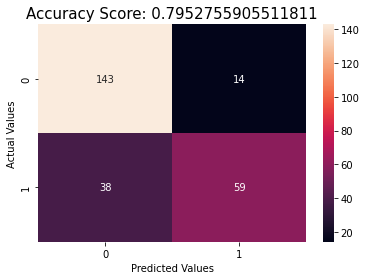

In [28]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       157
           1       0.81      0.61      0.69        97

    accuracy                           0.80       254
   macro avg       0.80      0.76      0.77       254
weighted avg       0.80      0.80      0.79       254



## Testing Model

In [30]:
# Defined data set (it should be diabetic)
data = [[5, 150, 33.7, 50, 150, 74, 0.5, 53]]

# Create the pandas DataFrame 
df_test = pd.DataFrame(data, columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

# Predict on new data
res = lr.predict(df_test)
res

array([1])

Yup... The result correct